In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Disclaimer: This data is NOT from an elevator, but from a simulation of an elevator by moving the accelerometer upwards, then downwards in a roughly uniform fashion by hand over a short distance. This was conducted due to the unfeasibility of conducting the experiment in real life, with recorded data being extremely noisy, and not conduisive to this analysis. For future cases, I would highly consider an experiment involving the derivation of the gravitational constant from a free falling object, as this would be much more accurate and less noisy, and would be much more readily available to all students, regardless of whether they are able to access an elevator.

# as this lab's purpose was to conduct data analysis and extract meaningful conclusions about the data using python, I have decided to proceed with this approach, should the data from a real elevator be absolutely critical to the analysis, I would like to be provided with some sample data, as all attempts to collect meaningful data were unsuccessful.

In [2]:
data = np.genfromtxt('accel_data2.csv', delimiter=',', skip_header=1)
# only take first 600 data points
data_up = data[200:1000]
data_down = data[1000:1400]
print(data_up)
print(data_down)

[[ 2.0008695   0.14535997  0.30963828 -0.06303298  0.3478197 ]
 [ 2.0108625  -0.17935144 -0.09875763 -0.22629251  0.30516931]
 [ 2.0208565  -0.27734513 -0.22098886  0.1662457   0.3916555 ]
 ...
 [ 9.96575408 -0.11202585 -0.09689516  0.13080338  0.19760564]
 [ 9.97574708 -0.04277472 -0.08205887  0.04539077  0.10307113]
 [ 9.98574108  0.01379048 -0.07345309 -0.0342524   0.08221168]]
[[ 9.99573408  0.07927779 -0.09235626 -0.05481005  0.13348703]
 [10.00572808  0.17432801 -0.1186946  -0.11619821  0.24079179]
 [10.01572108  0.20633103 -0.07463291 -0.18661447  0.28804084]
 ...
 [13.9631775   0.39366628  0.78649801  0.49674494  1.01010287]
 [13.9731705   0.51036395  0.42555951  0.93524226  1.14727954]
 [13.9831645   0.49712348 -0.07624119  1.34680029  1.43764234]]


In [3]:
time_up = data_up[:,0]
z_accel_up = data_up[:,3]
time_down = data_down[:,0]
z_accel_down = data_down[:,3]

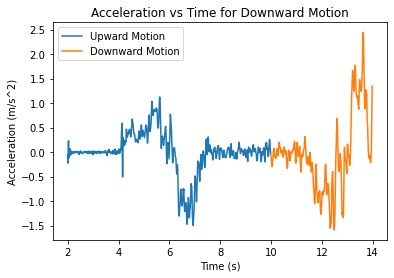

In [4]:
plt.plot(time_up, z_accel_up)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time for Upward Motion')

plt.plot(time_down, z_accel_down)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time for Downward Motion')

plt.legend(['Upward Motion', 'Downward Motion'])

In [5]:
# get the integral of the acceleration data at every time point without using np.cumsum
velocity_up = np.zeros(len(z_accel_up))
for enum, i in enumerate(data):
    if enum<len(z_accel_up)-1:
        time_delta = time_up[enum+1] - time_up[enum]
        velocity_up[enum] = sum(z_accel_up[:enum+1]*time_delta)

In [6]:
velocity_down = np.zeros(len(z_accel_down))
for enum, i in enumerate(data):
    if enum<len(z_accel_down)-1:
        time_delta = time_down[enum+1] - time_down[enum]
        velocity_down[enum] = sum(z_accel_down[:enum+1]*time_delta)

Text(0.5, 1.0, 'Velocity vs Time for Upward and Downward Motion')

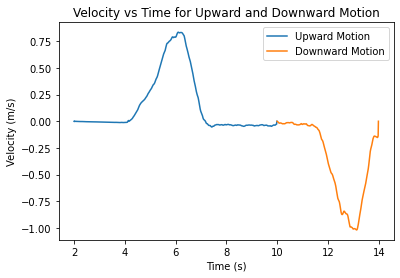

In [7]:
plt.plot(time_up, velocity_up)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.plot(time_down, velocity_down)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['Upward Motion', 'Downward Motion'])
plt.title('Velocity vs Time for Upward and Downward Motion')

In [8]:
distance_down = np.zeros(len(velocity_down))
for enum, i in enumerate(velocity_down):
    if enum<len(velocity_down)-1:
        time_delta = time_down[enum+1] - time_down[enum]
        distance_down[enum] = sum(velocity_down[:enum+1]*time_delta)

In [9]:
distance_up = np.zeros(len(velocity_up))
for enum, i in enumerate(velocity_up):
    if enum<len(velocity_up)-1:
        time_delta = time_up[enum+1] - time_up[enum]
        distance_up[enum] = sum(velocity_up[:enum+1]*time_delta)

Text(0.5, 1.0, 'Distance vs Time for Upward and Downward Motion')

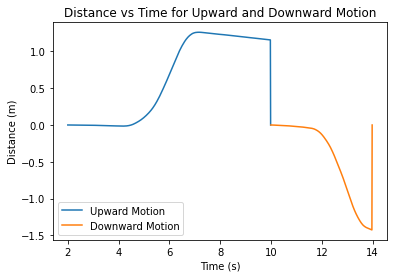

In [10]:
plt.plot(time_up, distance_up)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.plot(time_down, distance_down)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend(['Upward Motion', 'Downward Motion'])
plt.title('Distance vs Time for Upward and Downward Motion')

Text(0.5, 1.0, 'Acceleration and Velocity for Upward and Downward Motion')

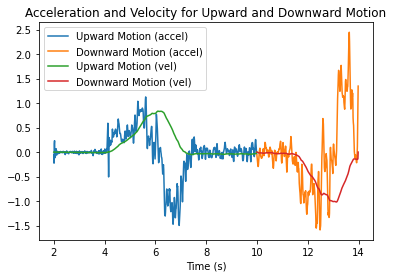

In [11]:
#superimposing all plots
plt.plot(time_up, z_accel_up)
plt.xlabel('Time (s)')
plt.plot(time_down, z_accel_down)
plt.plot(time_up, velocity_up)
plt.plot(time_down, velocity_down)
# plt.plot(time_up, distance_up)
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (m)')
# plt.plot(time_down, distance_down)
# plt.xlabel('Time (s)')
# plt.ylabel('Distance (m)')
plt.legend(['Upward Motion (accel)', 'Downward Motion (accel)', 'Upward Motion (vel)', 'Downward Motion (vel)'])
plt.title('Acceleration and Velocity for Upward and Downward Motion')

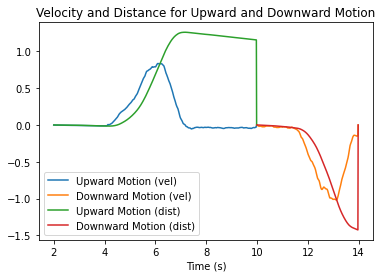

In [12]:
plt.plot(time_up, velocity_up)
plt.plot(time_down, velocity_down)
plt.xlabel('Time (s)')
plt.plot(time_up, distance_up)
plt.plot(time_down, distance_down)
plt.title('Velocity and Distance for Upward and Downward Motion')
plt.legend(['Upward Motion (vel)', 'Downward Motion (vel)', 'Upward Motion (dist)', 'Downward Motion (dist)'])

In [ ]:
# Based on the analysis, the displacement is the same for both upward and downward motion, and is found to be approximately 1.5m